<a href="https://colab.research.google.com/github/Mai-Thanh-Thuan-15-4-2/Machine_Learning_23/blob/main/Lab_7_20130127_MaiThanhThuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [20]:
# code
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib.pyplot as plt


In [56]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [8]:
# code
from sklearn.svm import SVC
from sklearn import datasets
import pandas as pd
import numpy as np
from prettytable import PrettyTable
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
from numpy import set_printoptions
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [4]:
from pandas.core.generic import RandomState
#code
# loading dataset
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target
# building model
dataset = svm.SVC(kernel ="sigmoid", random_state = 0)
scores = cross_validate(dataset, X, y, scoring="accuracy", cv = 10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666668


In [9]:

cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = svm.SVC(kernel='rbf', random_state=0)
scores = cross_val_score(model, X, y, scoring="accuracy", cv = cv)
print(scores.mean())

0.96


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [10]:
#code

X_new = SelectKBest(chi2, k=2).fit_transform(X, y)

clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, X_new, y, cv=5)

print(scores)

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [42]:
# code
dataset = datasets.load_iris()
# building model
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(dataset.data)
clusters = kmeans.predict(dataset.data)
kmeans.cluster_centers_.shape

(10, 4)

In [44]:
labels = np.zeros_like(clusters)
for i in range(10):
 mask = (clusters == i)
 labels[mask] = mode(dataset.target[mask])[0]
accuracy_score(dataset.target, labels)

0.9666666666666667

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [49]:
# code
mnist = datasets.load_digits()
digits = load_digits()

X = digits.data
y = digits.target

kmeans = KMeans(n_clusters=10)
X_transformed = kmeans.fit_transform(X)

classifiers = {
    'K-Means': kmeans,
    'Random Forest': RandomForestClassifier(),
    'kNN': KNeighborsClassifier(),
    'Naïve Bayes': GaussianNB()
}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_transformed, y, cv=5, scoring='accuracy')
    print(f'{name}: {scores.mean():.2f} (+/- {scores.std():.2f})')

K-Means: 0.06 (+/- 0.03)
Random Forest: 0.90 (+/- 0.03)
kNN: 0.92 (+/- 0.01)
Naïve Bayes: 0.85 (+/- 0.04)


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [50]:
#code
#Learn better supervision

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [51]:
agg_clust = AgglomerativeClustering(n_clusters=10)
agg_clust.fit(X)

AgglomerativeClustering(n_clusters=10)

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [52]:
#code
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/20130127_MaiThanhThuan'

Mounted at /content/gdrive
/content/gdrive/MyDrive/20130127_MaiThanhThuan


In [59]:
dataset = pd.read_csv('/content/gdrive/MyDrive/20130127_MaiThanhThuan/shopping-data.csv')

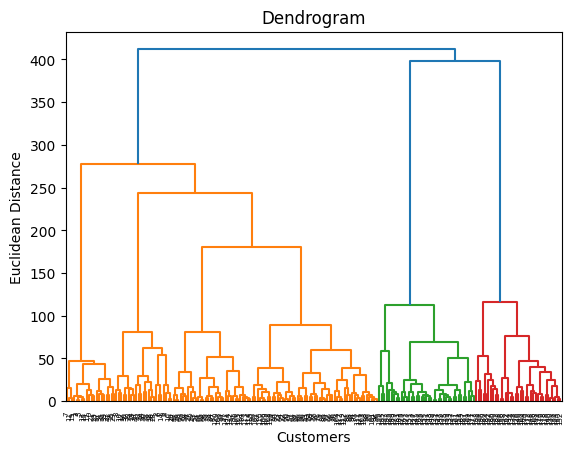

In [66]:
data = dataset.drop(['CustomerID', 'Genre'], axis=1)

Z = linkage(data, 'ward')

dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

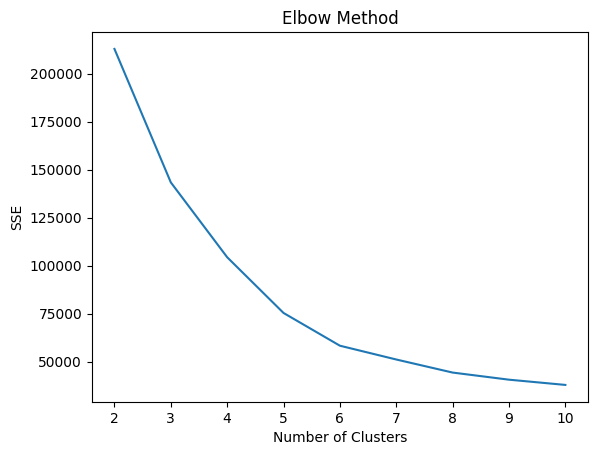

In [62]:
#code
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [63]:
#code
n_clusters = 3
agg_clust = AgglomerativeClustering(n_clusters=n_clusters)
agg_clust.fit(data)

AgglomerativeClustering(n_clusters=3)

#Finally,
Save a copy in your Github. Remember renaming the notebook.